#NOUS ALLONS TRAVAILLER CE DATAFRAME

*   Lire les éléments
*  Consulter les types
* voir les donner manquantes
* faire des graphique
* ...


In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
import math
from sklearn.preprocessing import StandardScaler

In [171]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

In [172]:
# Import the necessary module to mount Google Drive
from google.colab import drive

In [173]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
file_path = '/content/drive/MyDrive/DATA/synthetic_insurance_data.csv'

In [175]:
df = pd.read_csv(file_path)

verifions la dimension de notre dataframe

In [176]:
df.shape

(10000, 27)

verifions le types de données contenu dans chaque colonne

In [177]:
df.dtypes

,0
Age,int64
Is_Senior,float64
Marital_Status,object
Married_Premium_Discount,int64
Prior_Insurance,object
Prior_Insurance_Premium_Adjustment,float64
Claims_Frequency,int64
Claims_Severity,object
Claims_Adjustment,int64
Policy_Type,object


Informations plus détaillé sur le contenu de nos colonnes
sur le nombre de valeurs non nul ....


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 10000 non-null  int64  
 1   Is_Senior                           9987 non-null   float64
 2   Marital_Status                      9982 non-null   object 
 3   Married_Premium_Discount            10000 non-null  int64  
 4   Prior_Insurance                     10000 non-null  object 
 5   Prior_Insurance_Premium_Adjustment  9985 non-null   float64
 6   Claims_Frequency                    10000 non-null  int64  
 7   Claims_Severity                     9968 non-null   object 
 8   Claims_Adjustment                   10000 non-null  int64  
 9   Policy_Type                         9970 non-null   object 
 10  Policy_Adjustment                   10000 non-null  int64  
 11  Premium_Amount                      10000 

In [179]:
df.head(10)

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0.0,Married,86,1-5 years,50.0,0,Low,0,Full Coverage,...,10,0,5,1,2,99,704,-50,Suburban,50.0
1,37,0.0,Married,86,1-5 years,50.0,0,Low,0,Full Coverage,...,22,0,5,1,2,99,726,-50,Urban,100.0
2,49,0.0,Married,86,1-5 years,NaN,1,NaN,50,Full Coverage,...,28,0,4,4,1,99,772,-50,Urban,100.0
3,62,1.0,Married,86,>5 years,0.0,1,Low,50,NaN,...,4,1,6,2,2,2,809,-50,Urban,100.0
4,36,0.0,Single,0,>5 years,0.0,2,Low,100,Full Coverage,...,14,1,8,4,2,10,662,50,Suburban,50.0
5,36,0.0,Married,86,>5 years,0.0,0,Medium,0,Liability-Only,...,13,1,4,1,1,7,729,-50,Rural,0.0
6,63,1.0,NaN,86,1-5 years,50.0,0,Low,0,Full Coverage,...,2,1,5,1,2,1,795,-50,Urban,100.0
7,51,0.0,Single,0,<1 year,100.0,0,Low,0,Full Coverage,...,1,0,3,0,2,99,639,50,Suburban,50.0
8,32,0.0,Married,86,>5 years,0.0,0,Low,0,Liability-Only,...,16,1,5,1,3,3,724,-50,Rural,0.0
9,48,0.0,Single,0,>5 years,0.0,1,High,200,Full Coverage,...,27,0,5,3,2,99,710,-50,Urban,100.0


Nous allons afficher le nombre de données innexistante pour chaque colonne

In [180]:
df.isnull().sum()

,0
Age,0
Is_Senior,13
Marital_Status,18
Married_Premium_Discount,0
Prior_Insurance,0
Prior_Insurance_Premium_Adjustment,15
Claims_Frequency,0
Claims_Severity,32
Claims_Adjustment,0
Policy_Type,30


à l'inverse de #.head()
il affiche les 5 dernières lignes

In [181]:
df.tail()

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
9995,59,1.0,Single,0,1-5 years,50.0,0,Low,0,Full Coverage,...,6,1,4,3,2,9,783,-50,Urban,100.0
9996,18,0.0,Married,86,1-5 years,50.0,0,Medium,0,Full Coverage,...,3,1,6,1,3,6,667,50,Urban,100.0
9997,29,0.0,Married,86,<1 year,100.0,0,Low,0,Full Coverage,...,29,1,3,4,3,3,637,50,Urban,100.0
9998,47,0.0,Single,0,<1 year,100.0,0,Medium,0,Liability-Only,...,8,1,2,4,1,13,676,50,Suburban,50.0
9999,49,0.0,Divorced,0,1-5 years,50.0,0,High,0,Liability-Only,...,11,1,5,0,2,4,776,-50,Suburban,50.0


#Nous allons afficher notre df et analyser les incohérences

In [182]:
df

,Age,Is_Senior,Marital_Status,Married_Premium_Discount,Prior_Insurance,Prior_Insurance_Premium_Adjustment,Claims_Frequency,Claims_Severity,Claims_Adjustment,Policy_Type,...,Time_Since_First_Contact,Conversion_Status,Website_Visits,Inquiries,Quotes_Requested,Time_to_Conversion,Credit_Score,Premium_Adjustment_Credit,Region,Premium_Adjustment_Region
0,47,0.0,Married,86,1-5 years,50.0,0,Low,0,Full Coverage,...,10,0,5,1,2,99,704,-50,Suburban,50.0
1,37,0.0,Married,86,1-5 years,50.0,0,Low,0,Full Coverage,...,22,0,5,1,2,99,726,-50,Urban,100.0
2,49,0.0,Married,86,1-5 years,NaN,1,NaN,50,Full Coverage,...,28,0,4,4,1,99,772,-50,Urban,100.0
3,62,1.0,Married,86,>5 years,0.0,1,Low,50,NaN,...,4,1,6,2,2,2,809,-50,Urban,100.0
4,36,0.0,Single,0,>5 years,0.0,2,Low,100,Full Coverage,...,14,1,8,4,2,10,662,50,Suburban,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,59,1.0,Single,0,1-5 years,50.0,0,Low,0,Full Coverage,...,6,1,4,3,2,9,783,-50,Urban,100.0
9996,18,0.0,Married,86,1-5 years,50.0,0,Medium,0,Full Coverage,...,3,1,6,1,3,6,667,50,Urban,100.0
9997,29,0.0,Married,86,<1 year,100.0,0,Low,0,Full Coverage,...,29,1,3,4,3,3,637,50,Urban,100.0
9998,47,0.0,Single,0,<1 year,100.0,0,Medium,0,Liability-Only,...,8,1,2,4,1,13,676,50,Suburban,50.0


retourne #True s'il y'a une valeur manquante

In [183]:
df.isnull().any()

,0
Age,False
Is_Senior,True
Marital_Status,True
Married_Premium_Discount,False
Prior_Insurance,False
Prior_Insurance_Premium_Adjustment,True
Claims_Frequency,False
Claims_Severity,True
Claims_Adjustment,False
Policy_Type,True


In [184]:
# Sélectionnez les colonnes ayant des valeurs manquantes
col_manqte = df.columns[df.isnull().any()]

col_manqte

df[col_manqte].head(20)

,Is_Senior,Marital_Status,Prior_Insurance_Premium_Adjustment,Claims_Severity,Policy_Type,Premium_Adjustment_Region
0,0.0,Married,50.0,Low,Full Coverage,50.0
1,0.0,Married,50.0,Low,Full Coverage,100.0
2,0.0,Married,NaN,NaN,Full Coverage,100.0
3,1.0,Married,0.0,Low,NaN,100.0
4,0.0,Single,0.0,Low,Full Coverage,50.0
5,0.0,Married,0.0,Medium,Liability-Only,0.0
6,1.0,NaN,50.0,Low,Full Coverage,100.0
7,0.0,Single,100.0,Low,Full Coverage,50.0
8,0.0,Married,0.0,Low,Liability-Only,0.0
9,0.0,Single,0.0,High,Full Coverage,100.0


In [185]:
df.columns

Index(['Age', 'Is_Senior', 'Marital_Status', 'Married_Premium_Discount',
       'Prior_Insurance', 'Prior_Insurance_Premium_Adjustment',
       'Claims_Frequency', 'Claims_Severity', 'Claims_Adjustment',
       'Policy_Type', 'Policy_Adjustment', 'Premium_Amount',
       'Safe_Driver_Discount', 'Multi_Policy_Discount', 'Bundling_Discount',
       'Total_Discounts', 'Source_of_Lead', 'Time_Since_First_Contact',
       'Conversion_Status', 'Website_Visits', 'Inquiries', 'Quotes_Requested',
       'Time_to_Conversion', 'Credit_Score', 'Premium_Adjustment_Credit',
       'Region', 'Premium_Adjustment_Region'],
      dtype='object')

#Nous avons décidé de changer le nom de certaines colonnes pour nous faciliter le travail

In [186]:
df = df.rename(columns={'Marital_Status': 'statut',
                        'Married_Premium_Discount':'remise_marie',
                        'Prior_Insurance':'ass_ant',
                        'Prior_Insurance_Premium_Adjustment':'AjusPrim_assAnt',
                        'Claims_Frequency':'freq_sini',
                        'Claims_Severity':'gravite',
                        'Claims_Adjustment':'Ajus_sini',
                        'Policy_Type':'typ_polic',
                        'Policy_Adjustment':'Ajus_polic',
                        'Premium_Amount':'prime',
                        'Safe_Driver_Discount':'rem_bonCond',
                        'Multi_Policy_Discount':'rem_multiContr',
                        'Bundling_Discount':'rem_group',
                        'Total_Discounts':'remise',
                        'Source_of_Lead':'sourc_prospect',
                        'Time_Since_First_Contact':'t_premier_contact',
                        'Conversion_Status':'statu_conv',
                        'Quotes_Requested':'devis',
                        'Time_to_Conversion':'delai_conv',
                        'Premium_Adjustment_Credit':'Ajus_credi',
                        'Premium_Adjustment_Region':'Ajus_region'
                        })

In [187]:
df.head(25)

,Age,Is_Senior,statut,remise_marie,ass_ant,AjusPrim_assAnt,freq_sini,gravite,Ajus_sini,typ_polic,...,t_premier_contact,statu_conv,Website_Visits,Inquiries,devis,delai_conv,Credit_Score,Ajus_credi,Region,Ajus_region
0,47,0.0,Married,86,1-5 years,50.0,0,Low,0,Full Coverage,...,10,0,5,1,2,99,704,-50,Suburban,50.0
1,37,0.0,Married,86,1-5 years,50.0,0,Low,0,Full Coverage,...,22,0,5,1,2,99,726,-50,Urban,100.0
2,49,0.0,Married,86,1-5 years,NaN,1,NaN,50,Full Coverage,...,28,0,4,4,1,99,772,-50,Urban,100.0
3,62,1.0,Married,86,>5 years,0.0,1,Low,50,NaN,...,4,1,6,2,2,2,809,-50,Urban,100.0
4,36,0.0,Single,0,>5 years,0.0,2,Low,100,Full Coverage,...,14,1,8,4,2,10,662,50,Suburban,50.0
5,36,0.0,Married,86,>5 years,0.0,0,Medium,0,Liability-Only,...,13,1,4,1,1,7,729,-50,Rural,0.0
6,63,1.0,NaN,86,1-5 years,50.0,0,Low,0,Full Coverage,...,2,1,5,1,2,1,795,-50,Urban,100.0
7,51,0.0,Single,0,<1 year,100.0,0,Low,0,Full Coverage,...,1,0,3,0,2,99,639,50,Suburban,50.0
8,32,0.0,Married,86,>5 years,0.0,0,Low,0,Liability-Only,...,16,1,5,1,3,3,724,-50,Rural,0.0
9,48,0.0,Single,0,>5 years,0.0,1,High,200,Full Coverage,...,27,0,5,3,2,99,710,-50,Urban,100.0


In [188]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns
numeric_cols

Index(['Age', 'Is_Senior', 'remise_marie', 'AjusPrim_assAnt', 'freq_sini',
       'Ajus_sini', 'Ajus_polic', 'prime', 'rem_bonCond', 'rem_multiContr',
       'rem_group', 'remise', 't_premier_contact', 'statu_conv',
       'Website_Visits', 'Inquiries', 'devis', 'delai_conv', 'Credit_Score',
       'Ajus_credi', 'Ajus_region'],
      dtype='object')

In [189]:
# Select categorical columns (object type)
categorical_cols = df.select_dtypes(include='object').columns
categorical_cols

Index(['statut', 'ass_ant', 'gravite', 'typ_polic', 'sourc_prospect',
       'Region'],
      dtype='object')

#ESSAYONS DE COMPLETER TOUTES LES VALEURS MANQUANTES

Affichons la moyenne de chaque colonne de type numerique

In [190]:
df[numeric_cols].mean()

,0
Age,39.991700
Is_Senior,0.159307
remise_marie,42.131400
AjusPrim_assAnt,47.621432
freq_sini,0.497200
Ajus_sini,36.780000
Ajus_polic,-79.860000
prime,2219.571400
rem_bonCond,0.199900
rem_multiContr,0.305100


*remarquons que l'age moyen est de 39.997
arrondissions alors par excès

In [192]:
#remplacons les donnée manquantes de type numeric de chaque colonne par la moyenne de la colonne

for col in numeric_cols:
  if df[col].isnull().any():
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)


In [193]:
"""
math.celi fait un arrondi par excès
math.floor fait un arrondi par défaut
.round fait un arrondi au plus proche
"""
df['Age']= df['Age'].apply(math.ceil)
df['Website_Visits'] = df['Website_Visits'].round()
df['prime']= df['prime'].round()

In [194]:
#dans 'Ajust_region' remplace les valeurs >50 par 100

df['Ajus_region'] = df['Ajus_region'].apply(lambda x: 100 if x > 50 else x)
df['Ajus_region'].head() # Optionally print to verify the change

,Ajus_region
0,50.0
1,100.0
2,100.0
3,100.0
4,50.0


In [195]:
df['Website_Visits']

,Website_Visits
0,5
1,5
2,4
3,6
4,8
...,...
9995,4
9996,6
9997,3
9998,2


on affiche les valeurs les plus fréquente des colonne de type catégories

In [196]:
df[categorical_cols].mode()

,statut,ass_ant,gravite,typ_polic,sourc_prospect,Region
0,Married,1-5 years,Low,Full Coverage,Online,Urban


In [197]:
# remplacons les données manquantes de type catégorique de chaque colonne par le mode de la colonne
for col in categorical_cols:
  if df[col].isnull().any():
    mode_value = df[col].mode()[0] # mode() can return multiple values, take the first
    df[col].fillna(mode_value, inplace=True)


<ipython-input-197-a835312a06e6>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mode_value, inplace=True)


In [198]:
df.isnull().sum()

,0
Age,0
Is_Senior,0
statut,0
remise_marie,0
ass_ant,0
AjusPrim_assAnt,0
freq_sini,0
gravite,0
Ajus_sini,0
typ_polic,0


In [199]:
df

,Age,Is_Senior,statut,remise_marie,ass_ant,AjusPrim_assAnt,freq_sini,gravite,Ajus_sini,typ_polic,...,t_premier_contact,statu_conv,Website_Visits,Inquiries,devis,delai_conv,Credit_Score,Ajus_credi,Region,Ajus_region
0,47,0.0,Married,86,1-5 years,50.000000,0,Low,0,Full Coverage,...,10,0,5,1,2,99,704,-50,Suburban,50.0
1,37,0.0,Married,86,1-5 years,50.000000,0,Low,0,Full Coverage,...,22,0,5,1,2,99,726,-50,Urban,100.0
2,49,0.0,Married,86,1-5 years,47.621432,1,Low,50,Full Coverage,...,28,0,4,4,1,99,772,-50,Urban,100.0
3,62,1.0,Married,86,>5 years,0.000000,1,Low,50,Full Coverage,...,4,1,6,2,2,2,809,-50,Urban,100.0
4,36,0.0,Single,0,>5 years,0.000000,2,Low,100,Full Coverage,...,14,1,8,4,2,10,662,50,Suburban,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,59,1.0,Single,0,1-5 years,50.000000,0,Low,0,Full Coverage,...,6,1,4,3,2,9,783,-50,Urban,100.0
9996,18,0.0,Married,86,1-5 years,50.000000,0,Medium,0,Full Coverage,...,3,1,6,1,3,6,667,50,Urban,100.0
9997,29,0.0,Married,86,<1 year,100.000000,0,Low,0,Full Coverage,...,29,1,3,4,3,3,637,50,Urban,100.0
9998,47,0.0,Single,0,<1 year,100.000000,0,Medium,0,Liability-Only,...,8,1,2,4,1,13,676,50,Suburban,50.0


In [200]:
#  connaitre les valeurs que peuvent prendre chacune des colonnes catégories

# Display the unique values for each categorical column
for col in categorical_cols:
    print(f"valeurs de : '{col}':")
    print(df[col].unique())
    print("\n")

valeurs de : 'statut':
['Married' 'Single' 'Widowed' 'Divorced']


valeurs de : 'ass_ant':
['1-5 years' '>5 years' '<1 year']


valeurs de : 'gravite':
['Low' 'Medium' 'High']


valeurs de : 'typ_polic':
['Full Coverage' 'Liability-Only']


valeurs de : 'sourc_prospect':
['Agent' 'Online' 'Referral']


valeurs de : 'Region':
['Suburban' 'Urban' 'Rural']




In [201]:
# verifier s'il y'a des doublons ou triplons

# Check for duplicate rows
duplicates = df.duplicated()
duplicates
#print("Number of duplicate rows:", duplicates.sum())

,0
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


on peut remarqué qu'il ny'a pas de valeurs dupliqué

In [202]:
# Sélectionner uniquement les colonnes numériques
numeric_cols_to_normalize = df.select_dtypes(include=np.number).columns

# Initialiser le StandardScaler
scaler = StandardScaler()

# Appliquer StandardScaler aux colonnes numériques
df[numeric_cols_to_normalize] = scaler.fit_transform(df[numeric_cols_to_normalize])

# Maintenant, vérifions si c'est normalisé en regardant les statistiques descriptives
# Nous nous attendons à ce que la moyenne soit très proche de 0 et l'écart-type très proche de 1
df[numeric_cols_to_normalize].describe()

,Age,Is_Senior,remise_marie,AjusPrim_assAnt,freq_sini,Ajus_sini,Ajus_polic,prime,rem_bonCond,rem_multiContr,...,remise,t_premier_contact,statu_conv,Website_Visits,Inquiries,devis,delai_conv,Credit_Score,Ajus_credi,Ajus_region
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,...,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-1.115552e-16,5.506706e-17,5.684342e-17,2.682299e-17,3.552714e-18,-3.268497e-17,1.065814e-18,1.254286e-15,2.557954e-17,5.293543e-17,...,-4.316547e-17,2.913225e-17,-1.207923e-17,2.771117e-17,3.659295e-17,1.396216e-16,-5.044853e-17,-1.129052e-15,3.037570e-17,-9.627854e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,...,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-1.565284e+00,-4.355935e-01,-9.800000e-01,-1.386254e+00,-6.943212e-01,-5.580592e-01,-1.226533e+00,-2.825136e+00,-4.998437e-01,-6.626130e-01,...,-8.937875e-01,-1.668445e+00,-1.167215e+00,-2.244251e+00,-1.410721e+00,-1.219647e+00,-9.917930e-01,-3.703809e+00,-7.942225e-01,-1.639662e+00
25%,-7.823466e-01,-4.355935e-01,-9.800000e-01,-1.386254e+00,-6.943212e-01,-5.580592e-01,-1.226533e+00,-8.051203e-01,-4.998437e-01,-6.626130e-01,...,-8.937875e-01,-8.617649e-01,-1.167215e+00,-9.038394e-01,-7.042653e-01,-1.219647e+00,-8.817727e-01,-6.684504e-01,-7.942225e-01,-3.651481e-01
50%,-7.058536e-02,-4.355935e-01,-9.800000e-01,6.923983e-02,-6.943212e-01,-5.580592e-01,8.153064e-01,1.106201e-01,-4.998437e-01,-6.626130e-01,...,5.904162e-01,6.015529e-02,8.567402e-01,-1.023181e-02,2.190011e-03,3.792661e-03,-7.497484e-01,1.500794e-02,-7.942225e-01,-3.651481e-01
75%,7.123520e-01,-4.355935e-01,1.020408e+00,6.923983e-02,7.021414e-01,2.005857e-01,8.153064e-01,7.839586e-01,-4.998437e-01,1.509177e+00,...,5.904162e-01,8.668354e-01,8.567402e-01,4.365720e-01,7.086453e-01,1.227232e+00,1.164604e+00,6.783645e-01,1.259093e+00,9.093654e-01
max,3.559397e+00,2.298707e+00,1.020408e+00,1.524734e+00,6.287992e+00,1.158026e+01,8.153064e-01,4.823990e+00,2.000625e+00,1.509177e+00,...,3.558824e+00,1.673516e+00,8.567402e-01,4.904610e+00,4.947377e+00,1.227232e+00,1.164604e+00,2.728739e+00,1.259093e+00,9.093654e-01


In [203]:
df.head()

,Age,Is_Senior,statut,remise_marie,ass_ant,AjusPrim_assAnt,freq_sini,gravite,Ajus_sini,typ_polic,...,t_premier_contact,statu_conv,Website_Visits,Inquiries,devis,delai_conv,Credit_Score,Ajus_credi,Region,Ajus_region
0,0.498824,-0.435593,Married,1.020408,1-5 years,0.069240,-0.694321,Low,-0.558059,Full Coverage,...,-0.631285,-1.167215,-0.010232,-0.704265,0.003793,1.164604,-0.206111,-0.794222,Suburban,-0.365148
1,-0.212938,-0.435593,Married,1.020408,1-5 years,0.069240,-0.694321,Low,-0.558059,Full Coverage,...,0.751595,-1.167215,-0.010232,-0.704265,0.003793,1.164604,0.236127,-0.794222,Urban,0.909365
2,0.641176,-0.435593,Married,1.020408,1-5 years,0.000000,0.702141,Low,0.200586,Full Coverage,...,1.443036,-1.167215,-0.457036,1.415101,-1.219647,1.164604,1.160806,-0.794222,Urban,0.909365
3,1.566465,2.298707,Married,1.020408,>5 years,-1.386254,0.702141,Low,0.200586,Full Coverage,...,-1.322725,0.856740,0.436572,0.002190,0.003793,-0.969789,1.904569,-0.794222,Urban,0.909365
4,-0.284114,-0.435593,Single,-0.980000,>5 years,-1.386254,2.098604,Low,0.959231,Full Coverage,...,-0.170325,0.856740,1.330180,1.415101,0.003793,-0.793757,-1.050383,1.259093,Suburban,-0.365148


In [204]:
ord =  {
    "gravite": {"Low": 1, "Medium": 2, "High": 3},
    "ass_ant": {"<1 year":0, "1-5 years": 1 , ">5 years": 2}
}

In [205]:
for col , mapp in ord.items():
  if col in df.columns:
    df[col] = df[col].map(mapp)

In [137]:
"""new_col = {
    "statut": {"Married": 0, "Single":1, "Widowed":2, "Divorced":3},
    "region": {"Suburban":0 , "Urban":1, "Rural":2},
    "sourc_prospect":{"Agent":0, "Online":1, "Referral":2},
    "typ_polic":{"Full Coverage":0 , "Liability-Only":1}
}
"""

In [138]:
"""
for c , m in new_col.items():
  if c in df.columns:
    df[c] = df[c].map(m)
    """"

In [206]:
df.head(20)

,Age,Is_Senior,statut,remise_marie,ass_ant,AjusPrim_assAnt,freq_sini,gravite,Ajus_sini,typ_polic,...,t_premier_contact,statu_conv,Website_Visits,Inquiries,devis,delai_conv,Credit_Score,Ajus_credi,Region,Ajus_region
0,0.498824,-0.435593,Married,1.020408,1,0.069240,-0.694321,1,-0.558059,Full Coverage,...,-0.631285,-1.167215,-0.010232,-0.704265,0.003793,1.164604,-0.206111,-0.794222,Suburban,-0.365148
1,-0.212938,-0.435593,Married,1.020408,1,0.069240,-0.694321,1,-0.558059,Full Coverage,...,0.751595,-1.167215,-0.010232,-0.704265,0.003793,1.164604,0.236127,-0.794222,Urban,0.909365
2,0.641176,-0.435593,Married,1.020408,1,0.000000,0.702141,1,0.200586,Full Coverage,...,1.443036,-1.167215,-0.457036,1.415101,-1.219647,1.164604,1.160806,-0.794222,Urban,0.909365
3,1.566465,2.298707,Married,1.020408,2,-1.386254,0.702141,1,0.200586,Full Coverage,...,-1.322725,0.856740,0.436572,0.002190,0.003793,-0.969789,1.904569,-0.794222,Urban,0.909365
4,-0.284114,-0.435593,Single,-0.980000,2,-1.386254,2.098604,1,0.959231,Full Coverage,...,-0.170325,0.856740,1.330180,1.415101,0.003793,-0.793757,-1.050383,1.259093,Suburban,-0.365148
5,-0.284114,-0.435593,Married,1.020408,2,-1.386254,-0.694321,2,-0.558059,Liability-Only,...,-0.285565,0.856740,-0.457036,-0.704265,-1.219647,-0.859769,0.296432,-0.794222,Rural,-1.639662
6,1.637642,2.298707,Married,1.020408,1,0.069240,-0.694321,1,-0.558059,Full Coverage,...,-1.553205,0.856740,-0.010232,-0.704265,0.003793,-0.991793,1.623145,-0.794222,Urban,0.909365
7,0.783528,-0.435593,Single,-0.980000,0,1.524734,-0.694321,1,-0.558059,Full Coverage,...,-1.668445,-1.167215,-0.903839,-1.410721,0.003793,1.164604,-1.512722,1.259093,Suburban,-0.365148
8,-0.568818,-0.435593,Married,1.020408,2,-1.386254,-0.694321,1,-0.558059,Liability-Only,...,0.060155,0.856740,-0.010232,-0.704265,1.227232,-0.947785,0.195923,-0.794222,Rural,-1.639662
9,0.570000,-0.435593,Single,-0.980000,2,-1.386254,0.702141,3,2.476520,Full Coverage,...,1.327796,-1.167215,-0.010232,0.708645,0.003793,1.164604,-0.085501,-0.794222,Urban,0.909365


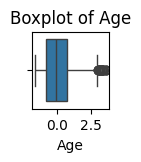

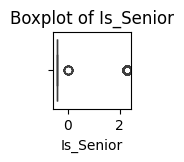

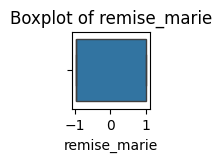

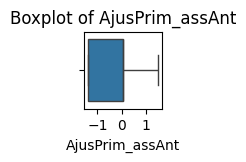

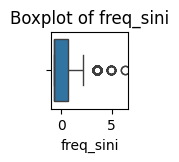

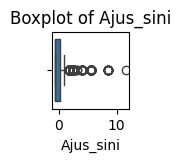

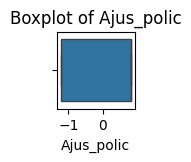

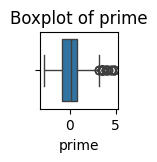

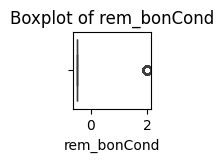

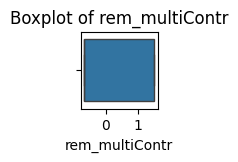

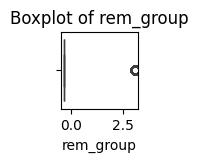

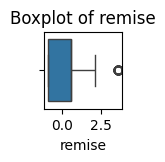

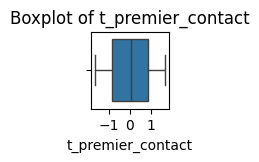

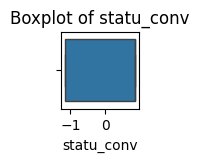

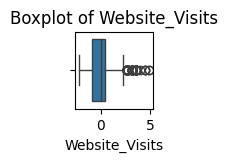

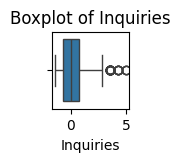

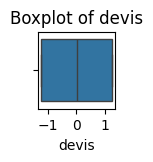

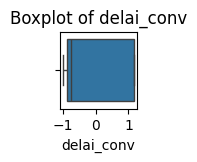

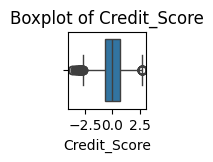

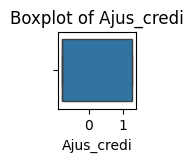

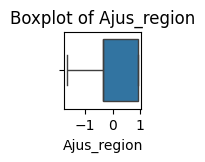

Number of outliers in 'Age' (Z-score > 3): 24
Number of outliers in 'Is_Senior' (Z-score > 3): 0
Number of outliers in 'remise_marie' (Z-score > 3): 0
Number of outliers in 'AjusPrim_assAnt' (Z-score > 3): 0
Number of outliers in 'freq_sini' (Z-score > 3): 164
Number of outliers in 'Ajus_sini' (Z-score > 3): 127
Number of outliers in 'Ajus_polic' (Z-score > 3): 0
Number of outliers in 'prime' (Z-score > 3): 36
Number of outliers in 'rem_bonCond' (Z-score > 3): 0
Number of outliers in 'rem_multiContr' (Z-score > 3): 0
Number of outliers in 'rem_group' (Z-score > 3): 972
Number of outliers in 'remise' (Z-score > 3): 53
Number of outliers in 't_premier_contact' (Z-score > 3): 0
Number of outliers in 'statu_conv' (Z-score > 3): 0
Number of outliers in 'Website_Visits' (Z-score > 3): 58
Number of outliers in 'Inquiries' (Z-score > 3): 42
Number of outliers in 'devis' (Z-score > 3): 0
Number of outliers in 'delai_conv' (Z-score > 3): 0
Number of outliers in 'Credit_Score' (Z-score > 3): 15
N

In [207]:
for col in numeric_cols:
    plt.figure(figsize=(1, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Define a threshold for Z-score (e.g., 3 or -3)
z_score_threshold = 3

for col in numeric_cols_to_normalize:
    # Identify rows where the absolute Z-score is greater than the threshold
    outliers_zscore = df[np.abs(df[col]) > z_score_threshold]
    print(f"Number of outliers in '{col}' (Z-score > {z_score_threshold}): {len(outliers_zscore)}")


#traitement des notre tableau numeriq

In [210]:

# Définissons la variable cible numérique
target_variable = 'Age'

# Liste des variables catégorielles à tester
categorical_features = df.select_dtypes(include='object').columns
print(categorical_features)
# Créer un DataFrame pour stocker les résultats de l'ANOVA
anova_results = pd.DataFrame(columns=['Feature', 'p-value'])

# Effectuer l'ANOVA pour chaque variable catégorielle par rapport à la variable cible
for feature in categorical_features:
    try:
        # On crée la formule pour l'ANOVA (VariableCible ~ VariableCategorielle)
        formula = f'{target_variable} ~ C({feature})'

        # Fit le modèle OLS (Ordinary Least Squares)
        model = ols(formula, data=df).fit()

        # Effectuer l'ANOVA
        anova_table = sm.stats.anova_lm(model, typ=2)

        # Extraire la p-value (la colonne 'PR(>F)' dans le tableau ANOVA)
        p_value = anova_table['PR(>F)'][0]

        # Ajouter les résultats au DataFrame
        anova_results = pd.concat([anova_results, pd.DataFrame([{'Feature': feature, 'p-value': p_value}])], ignore_index=True)

    except Exception as e:
        print(f"Impossible d'effectuer l'ANOVA pour la fonctionnalité '{feature}': {e}")

# Afficher les résultats de l'ANOVA triés par p-value
anova_results = anova_results.sort_values(by='p-value')
print("\nRésultats de l'ANOVA (impact des variables catégorielles sur 'prime'):")
print(anova_results)

# Sélectionner les variables qui ont un impact significatif sur la variable cible
# Un seuil de signification courant est alpha = 0.05.
alpha = 0.05
significant_features = anova_results[anova_results['p-value'] < alpha]['Feature'].tolist()

print(f"\nVariables catégorielles significativement liées à '{target_variable}' (p < {alpha}):")
print(significant_features)

# Créer le nouveau DataFrame df2 avec la variable cible numérique et les variables catégorielles significatives
# Inclure également les colonnes numériques originales qui pourraient être utiles.
# Pour l'instant, nous allons juste inclure la variable cible et les variables catégorielles significatives.
# Vous pouvez ajouter d'autres colonnes numériques si nécessaire.

# Colonnes numériques originales (excluant la variable cible si elle est déjà incluse)
numeric_cols_original = df.select_dtypes(include=np.number).columns.tolist()
if target_variable in numeric_cols_original:
    numeric_cols_original.remove(target_variable)

# Combiner la variable cible, les variables catégorielles significatives et les autres numériques originales si vous le souhaitez.
# Ici, on va créer df2 avec la variable cible et les variables catégorielles significatives.
columns_for_df2 = [target_variable] + significant_features

# Assurez-vous que toutes les colonnes sélectionnées existent dans le DataFrame original
columns_for_df2 = [col for col in columns_for_df2 if col in df.columns]

df2 = df[columns_for_df2].copy()

print("\nAperçu du nouveau DataFrame df2 basé sur l'ANOVA:")
print(df2.head())

print("\nColonnes dans df2:")
df2.columns


Index(['statut', 'typ_polic', 'sourc_prospect', 'Region'], dtype='object')


<ipython-input-210-e6c278386750>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table['PR(>F)'][0]
<ipython-input-210-e6c278386750>:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anova_results = pd.concat([anova_results, pd.DataFrame([{'Feature': feature, 'p-value': p_value}])], ignore_index=True)
<ipython-input-210-e6c278386750>:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by po


Résultats de l'ANOVA (impact des variables catégorielles sur 'prime'):
          Feature       p-value
0          statut  8.874999e-12
1       typ_polic  5.542995e-01
3          Region  6.688770e-01
2  sourc_prospect  7.490134e-01

Variables catégorielles significativement liées à 'Age' (p < 0.05):
['statut']

Aperçu du nouveau DataFrame df2 basé sur l'ANOVA:
        Age   statut
0  0.498824  Married
1 -0.212938  Married
2  0.641176  Married
3  1.566465  Married
4 -0.284114   Single

Colonnes dans df2:


Index(['Age', 'statut'], dtype='object')

In [211]:
df2

,Age,statut
0,0.498824,Married
1,-0.212938,Married
2,0.641176,Married
3,1.566465,Married
4,-0.284114,Single
...,...,...
9995,1.352937,Single
9996,-1.565284,Married
9997,-0.782347,Married
9998,0.498824,Single
